# Artificial Neural Network (ANNs)
Simulated using ANNs to perform various logical computations using propositional logic.<br>
<img src="../img/anns_logic_computations.png" alt="ANNs performing simple logical computations" style="width: 500px;"/><br>
## Perceptron
One of the simplest ANN architectures. It is based on another artificial neuron called a threshold logic unit (TLU), sometimes called a linear threshold unit (LTU): The inputs and outputs are row numbers (instead of binary on/off values) and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs (z= w_1x_1 + w_2x_2 + ... + w_nx_n = x^Tw) then applies a step function to that sum and outputs the result h_w(x) = step(z), where z = x_tw. <br>
<img src="../img/threshold_unit.png" alt="Threshold Logic Unit" style="width: 500px;"/><br>
The most common step function used in Perceptrons is the Heaviside step function. <br>
<img src="../img/common_step_functions.png" alt="Common Step Functions used in Perceptrons" style="width: 500px;"/><br>
A Perceptron is composed of a single layer of TLUs, with each TLU connected to all the inputs. <br>
When all neurons in single layer are connected to every neuron in the previous layer (i.e, its input neurons), it is called a **fully connected layer** or a **dense layer**.<br>
A Percepton with two inputs and three outputs is represented below. This Perceptron can classify instances simultaneously into three different binary classes, which make it a multi-output classifer.<br>
<img src="../img/perceptron_diagram.png" alt="Perceptron with two inputs and three outputs" style="width: 500px;"/><br>
<img src="../img/computing_output.png" alt="Computing outputs of a fulyl connected layer" style="width: 500px;"/><br>
<br>
"Cells that fire together, wire together" Siegrid Lowel
Also known as Hebb's rule (or Hebbian Learning). That is, the connection weight between two neurons is increased whenever they have the same output. <br>
The Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct predictions.<br>
<img src="../img/perceptron_learning_rule.png" alt="Perceptron learning rule (weight update)" style="width: 500px;"/><br>
<br>
The decision boundary of each output neuron is linear, so Perceptroms are incapable of learning complex patterns(just like Logistic Regression Classifers). However, if the training instances are linearly seperable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the **Perceptron Convergence theorem**.

In [1]:
# Scikit-Learn provides a Perceptron class that implements a single TLU network.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\William\AppData\Local\Temp\ipykernel_11040\905234873.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # Iris Setosa?


The limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is call a multi-layer Perceptron (MLP). In particular, an MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right of the figure below: with inputs (0, 0) or (1, 1) the network outputs 0, and with the inputs (0, 1) ir (1, 0) it outputs 1. All connections have weight equal to 1, except the four connections where the weight is shown. This network indeed solves the XOR problem! <br>
<img src="../img/mlp_xor_problem.png" alt="XOR classification problem and an MLP that solves it" style="width: 500px;"/><br>
<br>
### Multi-layer Perceptron and Backpropagation
An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layers are usually called the **lower layers** and the ones closer to the output are called the **upper layers**. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.<br>
<img src="../img/mlp.png" alt="Multi-Layer Perceptron" style="width: 500px;"/><br>
<br>
When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). Researchers struggled with training MLPs. When David Rumelhart, Geoffrey Hinton, and Ronald WIlliams introduced backpropagation training algorithm which is, in short, Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the netwrok's error with regards to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. <br>
Summarizing the algorith again: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

In [4]:
# Building an Image classifier 
# Using Keras to load a dataset
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# Creating a validation set
# Since we are working with Gradient Descent, we must scale the input features
# For simplicity, we scale the pixel intensity down to the 0-1 range by dividing
# them by 255.0 (also converts them to float)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
# Building the Neural Network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

### Breakdown of the code above
model = keras.models.Sequential()
- Creates a Sequential model.
- This is the simplest kind of model, for neural networks that are just composed of a single stack of layers, connected sequentiall.
- This is called the sequential API
<br>
#
model.add(keras.layers.Flatten(input_shape=[28,28]))
- Builds the first layer and add it to the model
- It is a Flatten layer whose role is simply to convert each input image into a 1D array: if it received input data X, it computes X.reshape(-1,1).
- This layer does not have any parameters, it is just there to do simple preprocessing.
- Since it's the first layer of the model, you should specify the **input_shape**: this does not include the batch size, only the shape of the instances.
- Alternatively, you could add a keras.layers.InputLayer as the first layer, setting shape=[28,28]
<br>
#
model.add(keras.layers.Dense(300, activation='relu'))
- Next, we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function.
- Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. 
- Also manages a vector of bias terms (one per neuron).
- When it receives some input data, it computes:<br>
<img src="../img/computing_output.png" alt="Computing outputs of a fulyl connected layer" style="width: 500px;"/><br>
#
model.add(keras.layers.Dense(100, activation='relu'))
- Next we add a second dense hidden layer with 100 neurons, also using the ReLU activation function.<br>
#
model.add(keras.layers.Dense(10, activation='softmax'))
- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive)

In [15]:
# Instead of adding the layers one by one, we could do:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Obtain model's list of layers
model.layers

In [19]:
# Fetch a layer by it's index
model.layers[1].name

'dense_3'

In [20]:
# Fetch a layer by it's name
model.get_layer('dense_3').name

'dense_3'

In [24]:
# All parameters of a layer can be accessed using its get_weights() and set_weights() method
hidden1 = model.layers[1] #hidden1.name   will output 'dense'
weights, biases = hidden1.get_weights()
weights

array([[-0.05263013, -0.03770253, -0.00352375, ..., -0.01688108,
         0.06511584, -0.02911106],
       [ 0.03732178, -0.0337542 ,  0.04668865, ...,  0.07274641,
         0.06863692,  0.0481708 ],
       [-0.06217652, -0.01679416,  0.00659889, ...,  0.05089553,
        -0.06837372,  0.06263876],
       ...,
       [ 0.05098173,  0.07139263, -0.05148792, ...,  0.04269697,
         0.00914418,  0.01109549],
       [-0.05238184, -0.05849144,  0.05433187, ..., -0.01371299,
        -0.03166789, -0.04849031],
       [-0.00114647,  0.01543771, -0.00833649, ..., -0.04973795,
        -0.04986561,  0.05984688]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
# After a model is created, you must call it's compile() method to specify
# the loss function and the optimizer to use. Also can specify a list of extra
# metrics to compute during training and evaluation

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7389 - accuracy: 0.7596 - val_loss: 0.5175 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4927 - accuracy: 0.8292 - val_loss: 0.4549 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4450 - accuracy: 0.8447 - val_loss: 0.4596 - val_accuracy: 0.8422
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4170 - accuracy: 0.8531 - val_loss: 0.4038 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3970 - accuracy: 0.8610 - val_loss: 0.3878 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3806 - accuracy: 0.8662 - val_loss: 0.3792 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3663 - accuracy: 0.8710 - val_loss: 0.3997 - val_accuracy:

### Per last epoch
We can see the validation is 89%
<br><br>
### Epochs
in terms of ANNs, an epoch refers to one cycle through the full training dataset. Usually training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patters, we hope for a better generalization when given a new 'unseen' input(test set). Epochs are often mixed up with an iteration. Iterations is the number of batches or steps through partitioned packets of the training data, needed to complete one epoch.<br>
https://deepai.org/machine-learning-glossary-and-terms/epoch

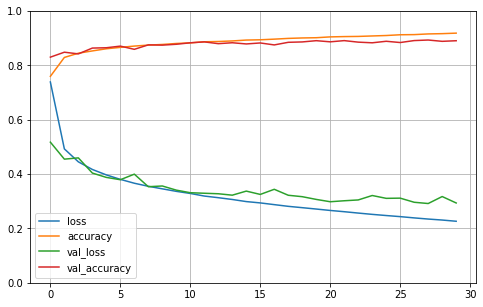

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the bertical range from [0-1]
plt.show()

From the graph above, we can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Good! Moreover, the validation curbes are quite close to the training curves, which means that there is not too much overfitting. 

In [32]:
# Once satisfied with the accuracy, you can use evaluate() method to evaluate the on the test set to estimate the generalization error before deploying
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 57.5352 - accuracy: 0.8532


[57.535186767578125, 0.8532000184059143]

In [33]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Bulding a Regression MLP using the Sequential API


In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valud_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Main difference is that the output layer has a single neuron, since we only want to predict a single value

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] #pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

# Building complex models using the functional API

an example of a non-sequential neural network is a **Wide and Deep** neural network. It connects all or part of the inputs directly to the output layer. <br>
<img src="../img/wide_and_deep.png" alt="Wide and Deep Neural Network" style="width: 500px;"/><br>
